In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 實作:鳶尾花資料集

In [3]:
df = pd.read_csv('C:/Users/jason/OneDrive/桌面/SCU/iris.txt',header = None, names=['sepal_length','sepal_width','petal_length','petal_width','class'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


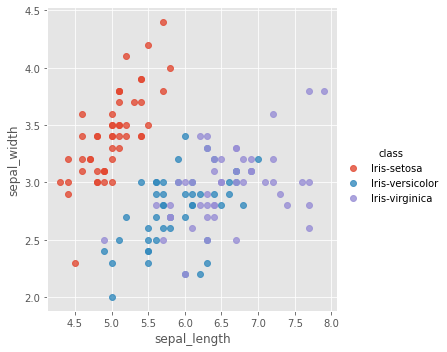

In [12]:
plt.style.use('ggplot')
sns.lmplot('sepal_length','sepal_width',data = df, fit_reg = False,hue='class')

In [7]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.iloc[:,:-1].values #class以外的所有值
y = df.iloc[:,4].values #第四行的值
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 1)

# KNN

* 確定k⼤⼩和距離 (k = 5)

* 對於test中的⼀個樣本，找到test中和它最近的k個樣本

* 將這k個樣本的投票結果作為測試樣本的類別 (多數決)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors=3) #選最近的3個點
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

# 準確度

* 每一次獨立的測量之間，其平均值與已知的數據真值之間的差距

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
accuracy_score(y_test,pred)

0.98

# 交叉驗證

* 可避免依賴某一特定的訓練和測試資料產生偏差

In [18]:
from sklearn.model_selection import cross_val_score

In [30]:
scores = cross_val_score(knn,X_train,y_train,cv=10,scoring='accuracy') #cv指的是分幾組
print(scores)
print(scores.mean())

[1.  1.  0.9 1.  1.  0.7 1.  0.9 0.9 0.8]
0.9200000000000002


In [43]:
neighbors = [x for x in range(1,50) if x%2!=0]
cv_scores= []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X_train,y_train,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())

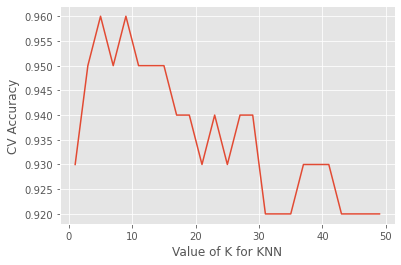

In [44]:
plt.plot(neighbors,cv_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('CV Accuracy')
plt.show()

In [35]:
MSE=[1- x for x in cv_scores ]
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors : %d" % optimal_k)

The optimal number of neighbors : 5
